### Programming Assignment 2 : Rafat Hasan

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

### Reading Dataset :

In [3]:
dataset = []
headers = []
with open('dataset.csv') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    dataset = list(reader)
dataset = np.array(dataset).astype(float)
dataset

array([[  1.  , 337.  , 118.  , ...,   9.65,   1.  ,   0.92],
       [  2.  , 324.  , 107.  , ...,   8.87,   1.  ,   0.76],
       [  3.  , 316.  , 104.  , ...,   8.  ,   1.  ,   0.72],
       ...,
       [498.  , 330.  , 120.  , ...,   9.56,   1.  ,   0.93],
       [499.  , 312.  , 103.  , ...,   8.43,   0.  ,   0.73],
       [500.  , 327.  , 113.  , ...,   9.04,   0.  ,   0.84]])

### Slicing and including the intercept:

In [4]:
X = np.hstack((np.ones((500,1)), dataset.copy()[:,1:-1]))
X

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   9.65,   1.  ],
       [  1.  , 324.  , 107.  , ...,   4.5 ,   8.87,   1.  ],
       [  1.  , 316.  , 104.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [  1.  , 330.  , 120.  , ...,   5.  ,   9.56,   1.  ],
       [  1.  , 312.  , 103.  , ...,   5.  ,   8.43,   0.  ],
       [  1.  , 327.  , 113.  , ...,   4.5 ,   9.04,   0.  ]])

In [5]:
y = dataset.copy()[:,-1:]
y[:10,:]

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45]])

### Batch Gradient Decent

In [72]:
params = np.zeros((X.shape[1],1)).astype(float)
alpha = 0.0001
epochs = 100
batch_result = []
def hypothesis(sample):
    global params
    return np.dot(sample,params)

def cost():
    global X, y
    sum_sqr = 0
    for sample, y_value in zip(X,y):
        sum_sqr += ((hypothesis(sample)) - y_value)**2
    return sum_sqr/(2*X.shape[0])

def batch_gradient_decent():
    global params,alpha,X,y,epochs, batch_result
    updates = np.zeros((X.shape[1],1)).astype(float)
    batch_result.append(cost())
    
    for i in range(epochs):
        for update,param,j in zip(updates, params, range(X.shape[1])):
            for sample,y_value in zip(X,y):
                update[0] = param - (alpha * (hypothesis(sample) - y_value) * sample[j])/X.shape[0]
        params = updates.copy()
        batch_result.append(cost())
batch_gradient_decent()

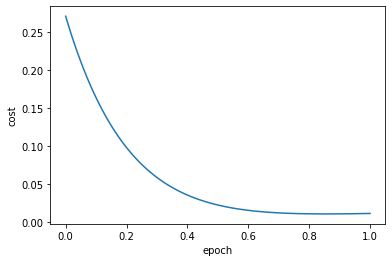

In [93]:
plt.plot( np.linspace(0,1,len(batch_result)),batch_result)
plt.ylabel("cost")
plt.xlabel("epoch")
plt.show()

### Stochastic Gradient Decent

In [86]:
params = np.zeros((X.shape[1],1)).astype(np.float64)
alpha = 0.00001
epochs = 100
stochastic_result = []
def hypothesis(sample):
    global params
    return np.dot(sample,params)

def cost():
    global X, y
    val = 0
    for sample,y_value in zip(X,y):
        val += ( (hypothesis(sample) - y_value)**2 )/2
    return  val/X.shape[0]

def stochastic_gradient_decent():
    global params,alpha,X,y,epochs, stochastic_result
    updates = np.zeros((X.shape[1],1)).astype(np.float64)
    stochastic_result.append(cost())
    
    for i in range(epochs):
        np.random.shuffle(X)
        for sample,y_value in zip(X,y):
            for update,param,j in zip(updates, params, range(X.shape[1])):
                grad = (hypothesis(sample)-y_value) * sample[j]
                update[0] = param - alpha * grad
        params = updates.copy()
        stochastic_result.append(cost())
stochastic_gradient_decent()    

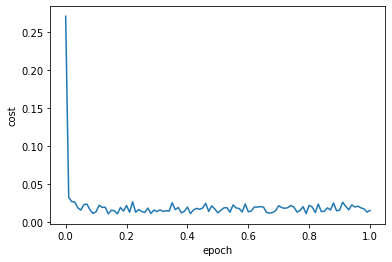

In [95]:
plt.plot(np.linspace(0,1,len(stochastic_result)), stochastic_result)
plt.ylabel("cost")
plt.xlabel("epoch")
plt.show()

### Mini Batch Gradient Decent

In [91]:
X = np.hstack((np.ones((500,1)), dataset.copy()[:,1:-1]))
params = np.zeros((X.shape[1],1)).astype(float)
alpha = 0.00001
epochs = 100
mini_batch_result = []
def hypothesis(sample):
    global params
    return np.dot(sample,params)

def cost():
    global X, y
    sum_sqr = 0
    for sample, y_value in zip(X,y):
        sum_sqr += ((hypothesis(sample)) - y_value)**2
    return sum_sqr/(2*X.shape[0])

def mini_batch_gradient_decent():
    global params,alpha,X,y,epochs, stochastic_result
    updates = np.zeros((X.shape[1],1)).astype(float)
    mini_batch_result.append(cost())
    
    batch = 10
    for i in range(epochs):
        np.random.shuffle(X)
        for i in range(0,X.shape[0],batch):
            for update,param,j in zip(updates, params, range(X.shape[1])):
                grad = 0
                for k in range(i,i+batch):
                    grad =  (hypothesis(X[k]) - y[k]) * X[k][j]
                    update[0] = param - (alpha * grad)
        params = updates.copy()
        mini_batch_result.append(cost())
mini_batch_gradient_decent()    

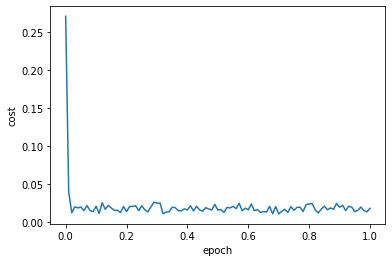

In [94]:
plt.plot(np.linspace(0,1,len(mini_batch_result)), mini_batch_result)
plt.ylabel("cost")
plt.xlabel("epoch")
plt.show()

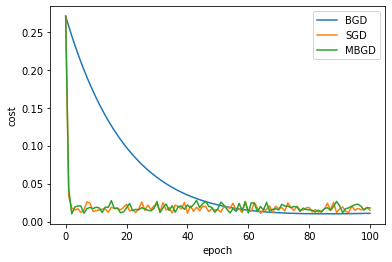

In [83]:
plt.plot([x for x  in range(len(batch_result))],batch_result, [x for x  in range(len(stochastic_result))],  stochastic_result, [x for x  in range(len(mini_batch_result))], mini_batch_result)
plt.legend(["BGD","SGD","MBGD"])
plt.ylabel("cost")
plt.xlabel("epoch")
plt.show()